# Analyzing Historical Stock/Revenue Data and Building a Dashboard


# Extracting and Visualizing Stock Data

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

Table of Contents
Define a Function that Makes a Graph
Question 1: Use yfinance to Extract Stock Data
Question 2: Use Webscraping to Extract Tesla Revenue Data
Question 3: Use yfinance to Extract Stock Data
Question 4: Use Webscraping to Extract GME Revenue Data
Question 5: Plot Tesla Stock Graph
Question 6: Plot GameStop Stock Graph


# Question 1: Use yfinance to Extract Stock Data OF TESLA

In [5]:
#Using the Ticker function enter the ticker symbol of the stock
#we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is TSLA.

tesla='TSLA'
stock=yf.Ticker(tesla)
stock

yfinance.Ticker object <TSLA>

Using the ticker object and the function history extract stock information and save it in a dataframe named tesla_data. Set the period parameter to "max" so we get information for the maximum amount of time.

In [6]:
stock_history=stock.history(period='max')
stock_history

Failed to get ticker 'TSLA' reason: HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Max retries exceeded with url: /v8/finance/chart/TSLA?range=1d&interval=1d (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000286A59CF450>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
- TSLA: No timezone found, symbol may be delisted


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


<Axes: >

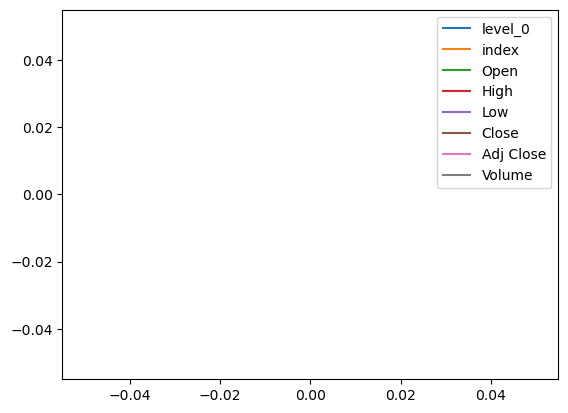

In [11]:
stock_history.plot()

Reset the index using the reset_index(inplace=True) function on the tesla_data DataFrame and display the first five rows of the tesla_data dataframe using the head function

In [9]:
reseting_index=stock_history.reset_index(inplace=True)


# Question 2: Use Webscraping to Extract Tesla Revenue Data

In [12]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
rqst=requests.get(url).text

In [14]:
parsing=BeautifulSoup(rqst,'html.parser')     #parsing with beaut soup
parsing


<!DOCTYPE html>

<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
<meta content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla revenue for the quarter ending September 30,

In [22]:
tesla_revenue=pd.read_html(url )
tesla_data=tesla_revenue[0]
tesla_data.columns=['Date','Revenue']   #here i just renamed the column names
tesla_data

,Date,Revenue
0,2021,"$53,823"
1,2020,"$31,536"
2,2019,"$24,578"
3,2018,"$21,461"
4,2017,"$11,759"
5,2016,"$7,000"
6,2015,"$4,046"
7,2014,"$3,198"
8,2013,"$2,013"
9,2012,$413


In [28]:
tesla_data.dropna(inplace=True)

tesla_data = tesla_data[tesla_data['Revenue'] != ""]       # in porder to remove null or empty spaces
tesla_data

,Date,Revenue
0,2021,"$53,823"
1,2020,"$31,536"
2,2019,"$24,578"
3,2018,"$21,461"
4,2017,"$11,759"
5,2016,"$7,000"
6,2015,"$4,046"
7,2014,"$3,198"
8,2013,"$2,013"
9,2012,$413


Text(0.5, 1.0, 'TESLA STOCK DATA')

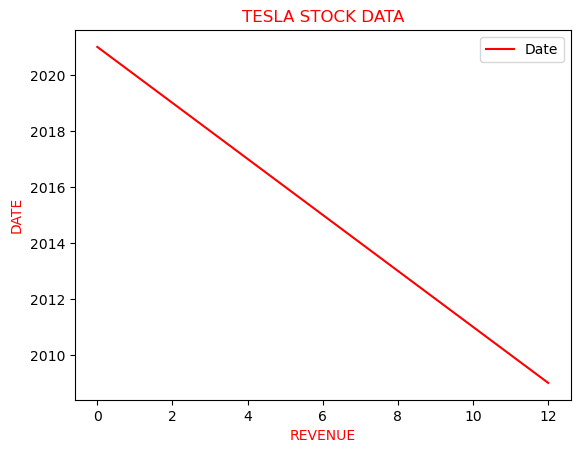

In [37]:
tesla_data.plot( color='r')
plt.ylabel('DATE',color='r')
plt.xlabel('REVENUE',color='r')
plt.title('TESLA STOCK DATA', color='r')

# Question 3: Use yfinance to Extract Stock Data OF GAMESHOP GME

In [29]:
Gameshop='GME'
stock=yf.Ticker(Gameshop)

In [30]:
gme_data=stock.history(period='max')
gme_data

GME: No data found for this date range, symbol may be delisted


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


# Question 4: Use Webscraping to Extract GME Revenue Data

In [38]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
rqst=requests.get(url).text

In [39]:
parsing=BeautifulSoup(rqst,'html.parser')
parsing

<!DOCTYPE html>

<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download" type="text/javascript"></script><script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download" type="text/javascript"></script><script async="" src=".

In [41]:
gme_revenue=pd.read_html(url)
gme_revenuedata=gme_revenue[0]
gme_revenuedata

,GameStop Annual Revenue (Millions of US $),GameStop Annual Revenue (Millions of US $).1
0,2020,"$6,466"
1,2019,"$8,285"
2,2018,"$8,547"
3,2017,"$7,965"
4,2016,"$9,364"
5,2015,"$9,296"
6,2014,"$9,040"
7,2013,"$8,887"
8,2012,"$9,551"
9,2011,"$9,474"


In [43]:
#lets rename column names for the above
gme_revenuedata.columns=['Date','Revenue']
gme_revenuedata

,Date,Revenue
0,2020,"$6,466"
1,2019,"$8,285"
2,2018,"$8,547"
3,2017,"$7,965"
4,2016,"$9,364"
5,2015,"$9,296"
6,2014,"$9,040"
7,2013,"$8,887"
8,2012,"$9,551"
9,2011,"$9,474"


Text(0.5, 1.0, 'GAMESHOP GME STOCK DATA')

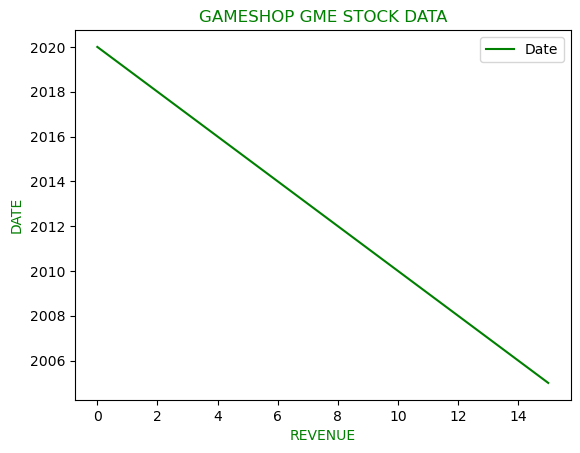

In [47]:
gme_revenuedata.plot(color='g')
plt.ylabel('DATE',color='g')
plt.xlabel('REVENUE',color='g')
plt.title('GAMESHOP GME STOCK DATA', color='g')